# Modelando o spread bancário no Brasil

por Otávio A. Allemand Borges

Vamos testar variáveis que influenciam no custo dos empréstimos no Brasil (spread) a partir da seéries temporais do Banco Central.


# 1. Pacotes

In [1]:
!pip install linearmodels
!pip install python-bcb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.4 MB/s eta 0:00:00


In [2]:
from bcb import sgs
import pandas as pd
import numpy as np
from linearmodels.iv import IV2SLS
import seaborn as sns
from plotnine import *

# 2. Coleta de dados

In [3]:
codes = {"spread" : 20783,
          "inadimplencia" : 21082,
          "provisoes" : 13645,
          "compulsorio" : 17633,
          "selic" : 4189,
          "desemprego" : 24369}

data = sgs.get(codes).dropna()

# 3. Análise de dados

## 3.1 Matriz de Correlação

In [4]:
data

,spread,inadimplencia,provisoes,compulsorio,selic,desemprego
Date,,,,,,
2012-03-01,18.41,3.67,5.7,407741349.0,9.82,8.0
2012-04-01,18.21,3.76,5.7,393022715.0,9.35,7.8
2012-05-01,16.96,3.76,5.7,393041552.0,8.87,7.7
2012-06-01,16.34,3.71,5.7,395009220.0,8.39,7.6
2012-07-01,16.12,3.72,5.7,383431755.0,8.07,7.5
...,...,...,...,...,...,...
2025-07-01,20.40,3.77,7.4,715410006.0,14.90,5.6
2025-08-01,20.61,3.95,7.6,723586221.0,14.90,5.6
2025-09-01,20.37,3.89,7.5,725786509.0,14.90,5.6


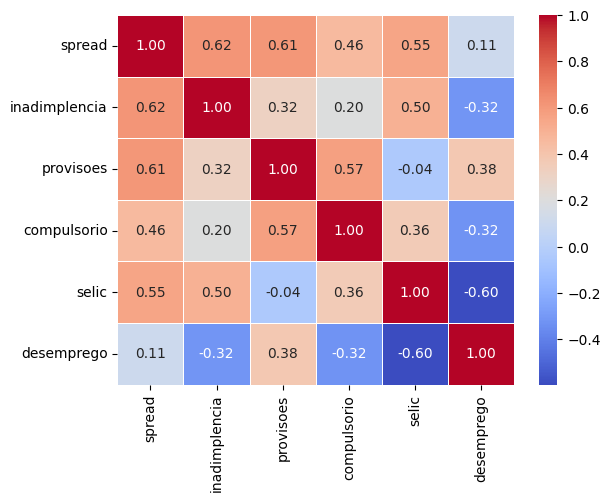

In [5]:
# Calcular a matriz de correlação
correlacao = data.corr()

# Plotar o gráfico de correlação
sns.heatmap(correlacao, annot=True, cmap = 'coolwarm', fmt='.2f', linewidths = 0.5);

# 3.2 Modelo

In [6]:
# Modelo via OLS
model_ols = IV2SLS.from_formula(
    formula = "spread ~ 1 + inadimplencia + provisoes + compulsorio + selic + desemprego",  # especificação do modelo no formato de fórmula
    data = data  # fonte dos dados
    ).fit() # estima o modelo

# Modelo via OLS com matriz de covariância robusta
model_ols_nw = IV2SLS.from_formula(
    formula = "spread ~ 1 + inadimplencia + provisoes + compulsorio + selic + desemprego",  # especificação do modelo no formato de fórmula
    data = data  # fonte dos dados
    ).fit(cov_type = 'kernel', kernel = 'bartlett') # estima o modelo

In [7]:
model_ols.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:                 spread   R-squared:                      0.8954
Estimator:                        OLS   Adj. R-squared:                 0.8921
No. Observations:                 165   F-statistic:                    1372.4
Date:                Wed, Jan 14 2026   P-value (F-stat)                0.0000
Time:                        11:52:29   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
=================================================================================
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept        -6.6146     0.7462    -8.8639     0.0000     -8.0773     -5.1520
inadimplencia     3.0905     0.2412     12.812     0.0000      2.6177      3.5633
provisoes        -0.4535     0.2158    -2.1012     0.0356     -0.8766     -0.0305
compulsorio    1.183e-08   1.04e-09     11.368     0.0000   9.789e-09   1.387e-08
selic             0.4370     0.0237     18.461     0.0000      0.3906      0.4834
desemprego        0.7991     0.0520     15.367     0.0000      0.6971      0.9010
=================================================================================
"""

In [8]:
model_ols_nw.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:                 spread   R-squared:                      0.8954
Estimator:                        OLS   Adj. R-squared:                 0.8921
No. Observations:                 165   F-statistic:                    338.42
Date:                Wed, Jan 14 2026   P-value (F-stat)                0.0000
Time:                        11:52:29   Distribution:                  chi2(5)
Cov. Estimator:                kernel                                         
                                                                              
                               Parameter Estimates                               
=================================================================================
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept        -6.6146     1.4384    -4.5986     0.0000     -9.4339     -3.7954
inadimplencia     3.0905     0.4279     7.2223     0.0000      2.2518      3.9292
provisoes        -0.4535     0.3368    -1.3467     0.1781     -1.1136      0.2065
compulsorio    1.183e-08  1.642e-09     7.2022     0.0000   8.609e-09   1.505e-08
selic             0.4370     0.0521     8.3844     0.0000      0.3349      0.5392
desemprego        0.7991     0.0955     8.3661     0.0000      0.6119      0.9863
=================================================================================
"""

In [9]:
# Compara os modelos
from linearmodels.iv import compare # módulo para comparar os modelos
print(compare({"OLS": model_ols, "OLS_NW": model_ols_nw}))

             Model Comparison             
                           OLS      OLS_NW
------------------------------------------
Dep. Variable           spread      spread
Estimator                  OLS         OLS
No. Observations           165         165
Cov. Est.               robust      kernel
R-squared               0.8954      0.8954
Adj. R-squared          0.8921      0.8921
F-statistic             1372.4      338.42
P-value (F-stat)        0.0000      0.0000
================== =========== ===========
Intercept              -6.6146     -6.6146
                     (-8.8639)   (-4.5986)
inadimplencia           3.0905      3.0905
                      (12.812)    (7.2223)
provisoes              -0.4535     -0.4535
                     (-2.1012)   (-1.3467)
compulsorio          1.183e-08   1.183e-08
                      (11.368)    (7.2022)
selic                   0.4370      0.4370
                      (18.461)    (8.3844)
desemprego              0.7991      0.7991
           

## Análise dos Resíduos

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


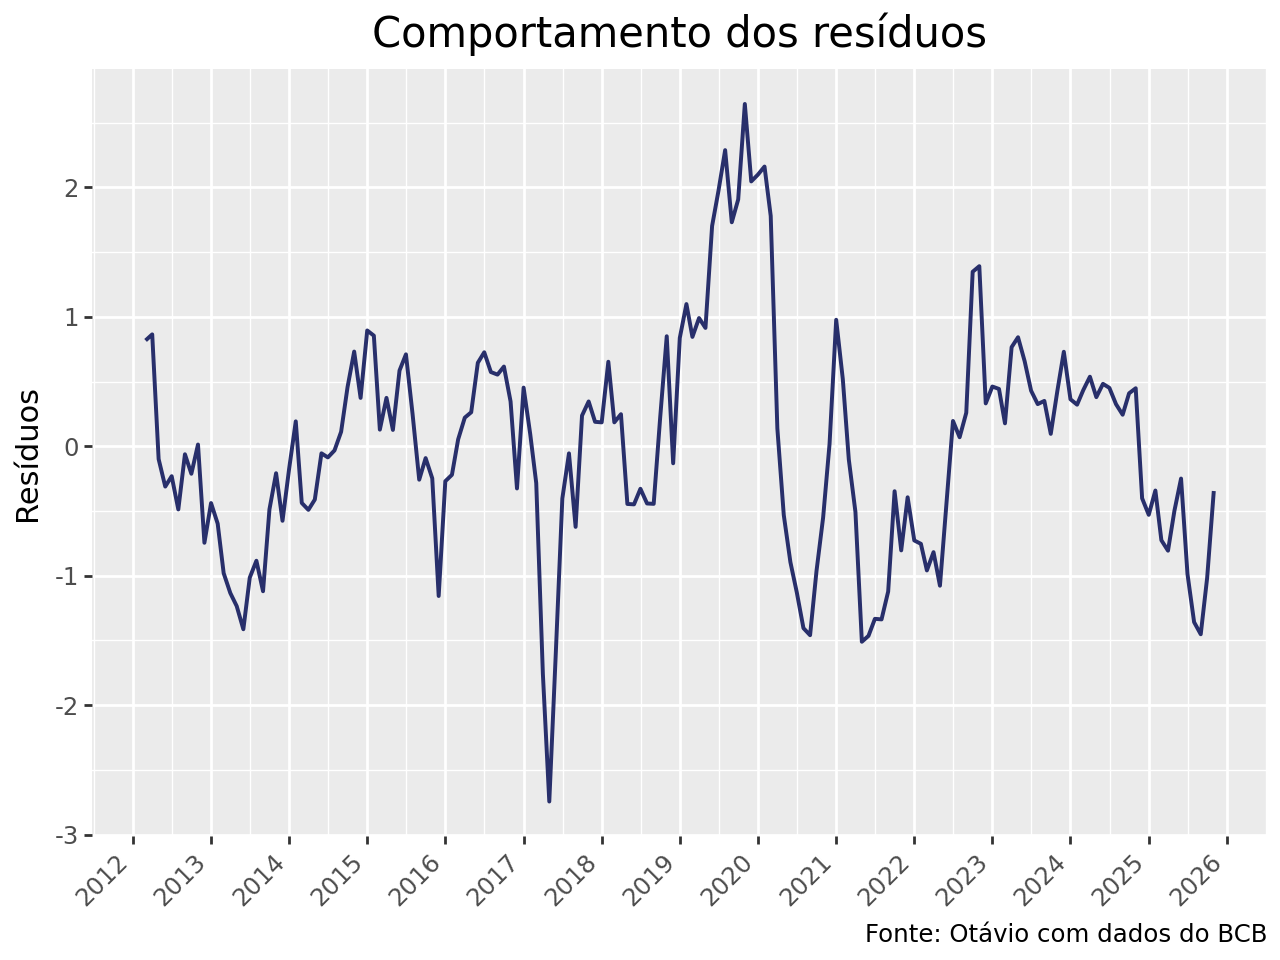

In [11]:
# Modelo via OLS com matriz de covariância robusta
model_ols_nw2 = IV2SLS.from_formula(
    formula = "spread ~ 1 + inadimplencia + compulsorio + selic + desemprego",  # especificação do modelo no formato de fórmula
    data = data  # fonte dos dados
    ).fit(cov_type = 'kernel', kernel = 'bartlett') # estima o modelo

# Residuos
residuos = pd.DataFrame(model_ols_nw2.resids).reset_index(names = "date")

# Plota
(
    ggplot(residuos, aes(x= 'date', y='residual'))
    + geom_line(size=0.8, color="#282f6b")
    + labs(x='', y='Resíduos', title='Comportamento dos resíduos',
           caption='Fonte: Otávio com dados do BCB')
    + scale_x_datetime(date_breaks="1 years", date_labels="%Y")
    + theme(
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(size=15)
    )
)

\bigskip

Os resíduos do modelo sugerem ser estacionários indicando que há uma relação de equilíbrio entre as variáveis utilizadas no modelo.[^1]

